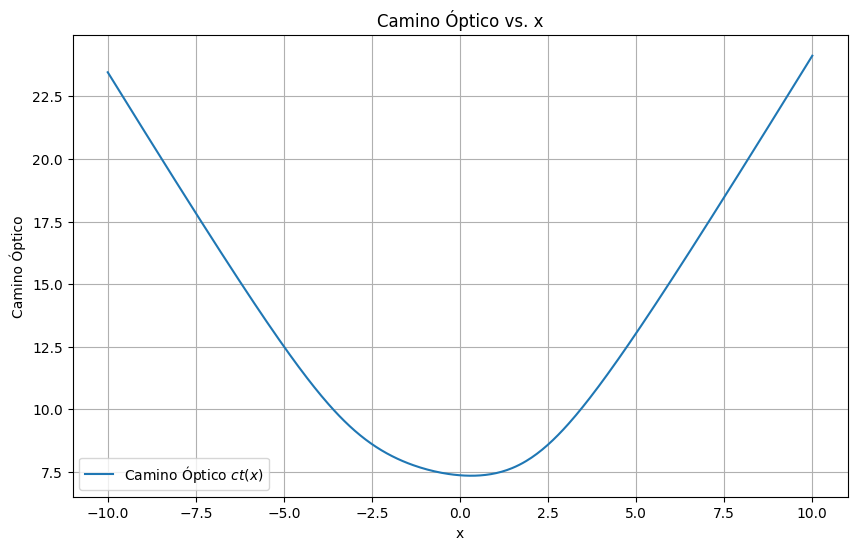

El valor mínimo de x es: 0.31690575714302655
Ángulo de incidencia α0: -31.08878 grados
Ángulo de refracción α1: 130.08219 grados
¿Se cumple la ley de Snell? No


In [10]:
import numpy as np
import matplotlib.pyplot as plt

#Punto B#

n0 = 1
n1 = 1.33

def camino_optico(x):
    d1 = np.sqrt((x + 3)**2 + 4)
    d2 = np.sqrt((x - 2)**2 + 4)
    return n0 * d1 + n1 * d2


x_values = np.linspace(-10, 10, 400)
y_values = camino_optico(x_values)


plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Camino Óptico $ct(x)$')

plt.grid(True)
plt.legend()
plt.show()

#Punto C#


def derivada_primera(x, h=1e-5):
    return (camino_optico(x + h) - camino_optico(x - h)) / (2 * h)


def derivada_segunda(x, h=1e-5):
    return (camino_optico(x + h) - 2 * camino_optico(x) + camino_optico(x - h)) / (h**2)


def newton_raphson(x0, epsilon=1e-9, max_iter=1000):
    x = x0
    for _ in range(max_iter):
        f_prime = derivada_primera(x)
        f_double_prime = derivada_segunda(x)
        if abs(f_prime) < epsilon:
            return x
        x -= f_prime / f_double_prime
    return x

x_min = newton_raphson(0)
print(f"El valor mínimo de x es: {x_min}")

#PUNTO D#

def calcular_angulos(x_min):
    punto_entrada = (x_min, 0)

    vector_entrada = np.array([x_min + 3, -2])

    vector_salida = np.array([x_min - 2, 2])

    angulo_entrada = np.arctan2(vector_entrada[1], vector_entrada[0])
    angulo_salida = np.arctan2(vector_salida[1], vector_salida[0])
    angulo_entrada_deg = np.degrees(angulo_entrada)
    angulo_salida_deg = np.degrees(angulo_salida)

    return angulo_entrada_deg, angulo_salida_deg

angulo_entrada, angulo_salida = calcular_angulos(x_min)
print(f"Ángulo de incidencia α0: {angulo_entrada:.5f} grados")
print(f"Ángulo de refracción α1: {angulo_salida:.5f} grados")

#PUNTO E#
def verificar_ley_snell(alpha0_deg, alpha1_deg):
    alpha0 = np.radians(alpha0_deg)
    alpha1 = np.radians(alpha1_deg)
    n0_n1 = np.sin(alpha1) / np.sin(alpha0)
    return np.isclose(n0_n1, n1 / n0, atol=1e-9)

cumple_ley_snell = verificar_ley_snell(angulo_entrada, angulo_salida)
print(f"¿Se cumple la ley de Snell? {'Sí' if cumple_ley_snell else 'No'}")